# **AI TECH INSTITUTE** · *Intermediate AI & Data Science*
### Week 04 · Notebook 09 — A/B Testing Framework: The Science of Better Decisions
**Instructor:** Amir Charkhi  |  **Goal:** Master the gold standard of data-driven decision making in tech and business.

> Format: short theory → quick practice → build understanding → mini-challenges.


---
## Learning Objectives
- Understand A/B testing fundamentals and when to use them
- Design statistically sound experiments with proper sample sizes
- Apply statistical significance testing and interpret p-values correctly
- Calculate statistical power and avoid common testing pitfalls
- Build a complete A/B testing framework for real business scenarios
- Recognize and avoid the most dangerous A/B testing mistakes

## 1. A/B Testing: The Scientific Method for Business
**The most powerful tool in data science**: Turn opinions into evidence with controlled experiments!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# Set style for nice plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

In [ ]:
# A/B Testing fundamentals
ab_testing_facts = {
    "🎯 The Goal": "Compare two versions to see which performs better",
    "🧪 The Method": "Randomly split users into control (A) and treatment (B) groups",
    "📊 The Math": "Use statistical tests to determine if differences are real or random",
    "⚖️ The Standard": "Statistical significance (usually p < 0.05)",
    "🔬 The Power": "Turns hunches into data-driven decisions",
    "💼 The Impact": "Billions in revenue optimization across tech industry"
}

print("🚀 A/B Testing: The Engine of Data-Driven Growth!")
for key, value in ab_testing_facts.items():
    print(f"   {key}: {value}")
    
print("\n💡 A/B testing is how Google, Facebook, Netflix, and Amazon make billions in optimizations!")

## 2. The Anatomy of an A/B Test

In [2]:
# Classic A/B test example: Website button color
np.random.seed(42)

# Test parameters
visitors_per_group = 10000
control_rate = 0.12      # 12% click rate for blue button
treatment_rate = 0.14    # 14% click rate for red button (2% improvement)

# Simulate the experiment
control_clicks = np.random.binomial(visitors_per_group, control_rate)
treatment_clicks = np.random.binomial(visitors_per_group, treatment_rate)

print(f"🔵 Button Color A/B Test Results:")
print(f"   Control (Blue Button): {control_clicks}/{visitors_per_group} = {control_clicks/visitors_per_group:.1%}")
print(f"   Treatment (Red Button): {treatment_clicks}/{visitors_per_group} = {treatment_clicks/visitors_per_group:.1%}")
print(f"   Observed lift: {(treatment_clicks/visitors_per_group - control_clicks/visitors_per_group):.1%}")
print(f"\n❓ But is this difference statistically significant or just luck?")

🔵 Button Color A/B Test Results:
   Control (Blue Button): 1171/10000 = 11.7%
   Treatment (Red Button): 1429/10000 = 14.3%
   Observed lift: 2.6%

❓ But is this difference statistically significant or just luck?


## 3. Statistical Significance Testing: The Heart of A/B Testing

### 3.1 The Two-Proportion Z-Test

In [3]:
# Build our statistical testing function
def two_proportion_z_test(successes_a, n_a, successes_b, n_b, alpha=0.05):
    """Perform two-proportion z-test for A/B testing"""
    
    # Calculate proportions
    p_a = successes_a / n_a
    p_b = successes_b / n_b
    
    # Pooled proportion (assuming null hypothesis: no difference)
    p_pool = (successes_a + successes_b) / (n_a + n_b)
    
    # Standard error
    se = np.sqrt(p_pool * (1 - p_pool) * (1/n_a + 1/n_b))
    
    # Z-statistic
    z_stat = (p_b - p_a) / se
    
    # P-value (two-tailed test)
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    
    # Confidence interval for difference
    se_diff = np.sqrt((p_a * (1 - p_a) / n_a) + (p_b * (1 - p_b) / n_b))
    z_critical = stats.norm.ppf(1 - alpha/2)
    diff = p_b - p_a
    margin = z_critical * se_diff
    ci_lower = diff - margin
    ci_upper = diff + margin
    
    return {
        'p_a': p_a,
        'p_b': p_b,
        'difference': diff,
        'z_statistic': z_stat,
        'p_value': p_value,
        'significant': p_value < alpha,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper
    }

print("📊 Statistical Testing Function Ready!")
print("   This function implements the math behind A/B test significance...")

📊 Statistical Testing Function Ready!
   This function implements the math behind A/B test significance...


In [4]:
# Test our button color experiment
test_results = two_proportion_z_test(control_clicks, visitors_per_group, 
                                   treatment_clicks, visitors_per_group)

print(f"🔬 Statistical Analysis Results:")
print(f"   Control rate: {test_results['p_a']:.3f} ({test_results['p_a']:.1%})")
print(f"   Treatment rate: {test_results['p_b']:.3f} ({test_results['p_b']:.1%})")
print(f"   Difference: {test_results['difference']:.3f} ({test_results['difference']:.1%})")
print(f"   Z-statistic: {test_results['z_statistic']:.3f}")
print(f"   P-value: {test_results['p_value']:.6f}")
print(f"   95% CI: [{test_results['ci_lower']:.3f}, {test_results['ci_upper']:.3f}]")
print(f"\n🎯 Result: {'✅ Statistically significant!' if test_results['significant'] else '❌ Not significant'}")

if test_results['significant']:
    print(f"   The red button IS better - this difference is unlikely due to chance")
else:
    print(f"   Cannot conclude the red button is better - might just be random variation")

🔬 Statistical Analysis Results:
   Control rate: 0.117 (11.7%)
   Treatment rate: 0.143 (14.3%)
   Difference: 0.026 (2.6%)
   Z-statistic: 5.425
   P-value: 0.000000
   95% CI: [0.016, 0.035]

🎯 Result: ✅ Statistically significant!
   The red button IS better - this difference is unlikely due to chance


### 3.2 Understanding P-Values and Confidence Intervals

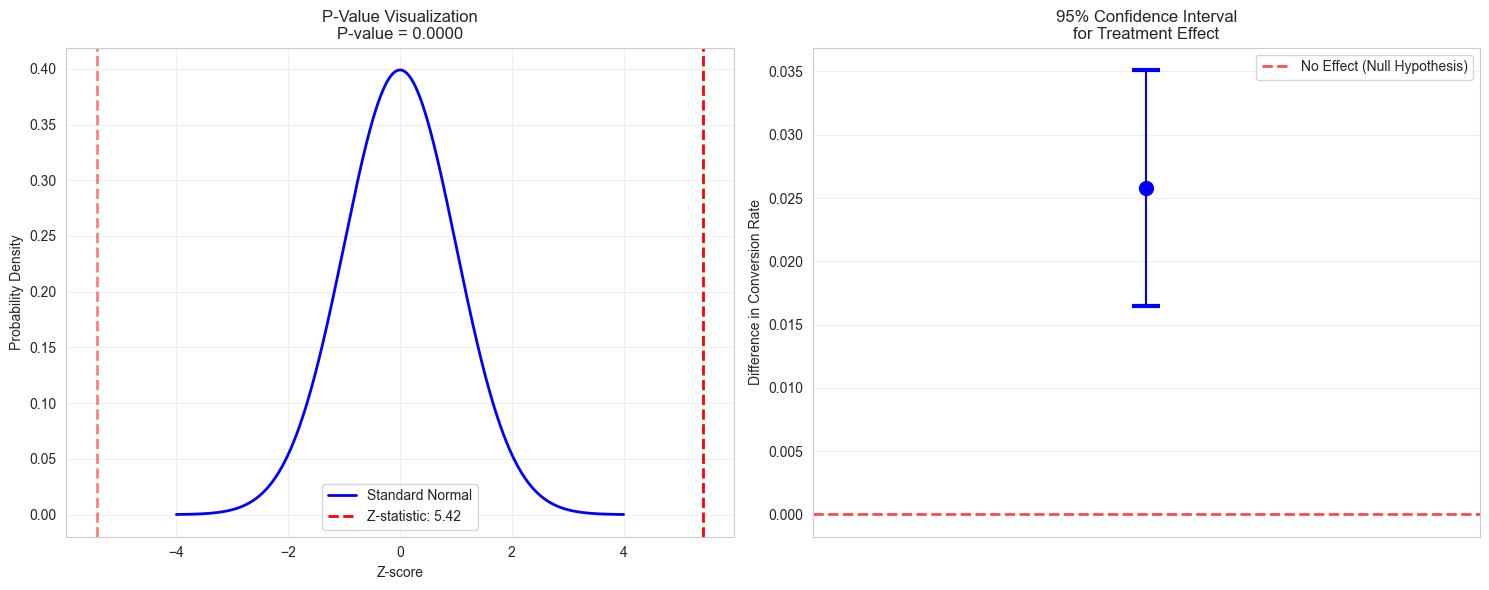

💡 Key Interpretations:
   • P-value: Probability of seeing this difference if there's actually no effect
   • CI: We're 95% confident the true effect is between 1.6% and 3.5%
   • Since CI doesn't include 0, we have significant improvement!


In [5]:
# Visualize what p-values and confidence intervals mean
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# P-value visualization
z_stat = test_results['z_statistic']
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x)

ax1.plot(x, y, 'b-', linewidth=2, label='Standard Normal')
ax1.axvline(z_stat, color='red', linestyle='--', linewidth=2, 
           label=f'Z-statistic: {z_stat:.2f}')
ax1.axvline(-z_stat, color='red', linestyle='--', linewidth=2, alpha=0.5)

# Shade p-value regions
x_tail_right = x[x >= abs(z_stat)]
y_tail_right = stats.norm.pdf(x_tail_right)
ax1.fill_between(x_tail_right, y_tail_right, alpha=0.3, color='red')

x_tail_left = x[x <= -abs(z_stat)]
y_tail_left = stats.norm.pdf(x_tail_left)
ax1.fill_between(x_tail_left, y_tail_left, alpha=0.3, color='red')

ax1.set_title(f'P-Value Visualization\nP-value = {test_results["p_value"]:.4f}')
ax1.set_xlabel('Z-score')
ax1.set_ylabel('Probability Density')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Confidence interval visualization
diff = test_results['difference']
ci_lower = test_results['ci_lower']
ci_upper = test_results['ci_upper']

ax2.errorbar(0, diff, yerr=[[diff - ci_lower], [ci_upper - diff]], 
            fmt='bo', capsize=10, capthick=3, markersize=10)
ax2.axhline(0, color='red', linestyle='--', linewidth=2, alpha=0.7, 
           label='No Effect (Null Hypothesis)')
ax2.set_ylabel('Difference in Conversion Rate')
ax2.set_title('95% Confidence Interval\nfor Treatment Effect')
ax2.set_xlim(-0.5, 0.5)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xticks([])

plt.tight_layout()
plt.show()

print(f"💡 Key Interpretations:")
print(f"   • P-value: Probability of seeing this difference if there's actually no effect")
print(f"   • CI: We're 95% confident the true effect is between {ci_lower:.1%} and {ci_upper:.1%}")
if ci_lower > 0:
    print(f"   • Since CI doesn't include 0, we have significant improvement!")
else:
    print(f"   • Since CI includes 0, we can't rule out no effect")

**Exercise 1 — Email Subject Line Test (easy)**  
Analyze an A/B test comparing email open rates.


In [ ]:
# Email A/B test scenario
# Subject A: "Don't Miss Out!" - 15,000 emails sent, 2,100 opened
# Subject B: "Exclusive Offer Inside" - 15,000 emails sent, 2,400 opened

emails_sent = 15000
opens_a = 2100
opens_b = 2400

print(f"📧 Email Subject Line A/B Test:")
print(f"   Subject A: {opens_a}/{emails_sent} opened ({opens_a/emails_sent:.1%})")
print(f"   Subject B: {opens_b}/{emails_sent} opened ({opens_b/emails_sent:.1%})")

# Your task: Use the two_proportion_z_test function to analyze this experiment
# Questions to answer:
# 1. What are the open rates for each subject line?
# 2. Is the difference statistically significant?
# 3. What's the confidence interval for the improvement?
# 4. What would you recommend to the marketing team?

# Your code here


<details>
<summary><b>Solution</b></summary>

```python
# Analyze email subject line A/B test
email_results = two_proportion_z_test(opens_a, emails_sent, opens_b, emails_sent)

print(f"📊 Email A/B Test Analysis:")
print(f"   Subject A open rate: {email_results['p_a']:.1%}")
print(f"   Subject B open rate: {email_results['p_b']:.1%}")
print(f"   Absolute improvement: {email_results['difference']:.1%}")
print(f"   Relative improvement: {(email_results['difference']/email_results['p_a']):.1%}")
print(f"\n📈 Statistical Results:")
print(f"   Z-statistic: {email_results['z_statistic']:.3f}")
print(f"   P-value: {email_results['p_value']:.6f}")
print(f"   95% CI: [{email_results['ci_lower']:.3f}, {email_results['ci_upper']:.3f}]")
print(f"   Significant: {'✅ Yes' if email_results['significant'] else '❌ No'}")

print(f"\n💼 Business Recommendation:")
if email_results['significant']:
    improvement = email_results['difference'] * emails_sent
    print(f"   ✅ Use Subject B: 'Exclusive Offer Inside'")
    print(f"   📈 Expected additional {improvement:.0f} opens per 15K emails")
    print(f"   💰 This represents a {(email_results['difference']/email_results['p_a']):.1%} relative improvement")
else:
    print(f"   ⚠️ No clear winner - continue testing or collect more data")
    print(f"   📊 The observed difference could be due to random variation")
    
print(f"\n🎯 Key Learning: Even small percentage improvements can mean thousands more opens!")
```
</details>

## 4. Sample Size Calculation: Planning for Success

### 4.1 Power Analysis and Effect Size

In [ ]:
# Sample size calculator for A/B tests
def calculate_ab_sample_size(baseline_rate, minimum_detectable_effect, 
                           alpha=0.05, power=0.8):
    """Calculate required sample size per group for A/B test"""
    
    # Convert relative effect to absolute
    if minimum_detectable_effect > 1:  # Assume it's a percentage if > 1
        minimum_detectable_effect = minimum_detectable_effect / 100
    
    new_rate = baseline_rate * (1 + minimum_detectable_effect)
    
    # Z-scores for alpha and power
    z_alpha = stats.norm.ppf(1 - alpha/2)  # Two-tailed
    z_beta = stats.norm.ppf(power)
    
    # Pooled proportion
    p_avg = (baseline_rate + new_rate) / 2
    
    # Sample size calculation
    effect_size = abs(new_rate - baseline_rate)
    n = (2 * p_avg * (1 - p_avg) * (z_alpha + z_beta)**2) / (effect_size**2)
    
    return {
        'sample_size_per_group': int(np.ceil(n)),
        'total_sample_size': int(np.ceil(2 * n)),
        'baseline_rate': baseline_rate,
        'target_rate': new_rate,
        'effect_size': effect_size,
        'relative_improvement': minimum_detectable_effect
    }

print("🎯 A/B Test Sample Size Calculator Ready!")
print("   Input your baseline rate and desired improvement to get required sample size...")

In [ ]:
# Example calculations for different scenarios
scenarios = [
    {"name": "Website Conversion", "baseline": 0.05, "improvement": 0.20},  # 20% relative improvement
    {"name": "Email Open Rate", "baseline": 0.15, "improvement": 0.15},     # 15% relative improvement  
    {"name": "App Install Rate", "baseline": 0.02, "improvement": 0.50},    # 50% relative improvement
    {"name": "Purchase Rate", "baseline": 0.08, "improvement": 0.25}        # 25% relative improvement
]

print(f"📊 Sample Size Requirements for Common A/B Tests:")
print(f"Test Type              | Baseline | Target  | Per Group | Total   | Days*")
print(f"-" * 75)

for scenario in scenarios:
    calc = calculate_ab_sample_size(scenario['baseline'], scenario['improvement'])
    
    # Estimate days assuming 1000 visitors per day
    daily_visitors = 1000
    days_needed = calc['sample_size_per_group'] / (daily_visitors / 2)
    
    print(f"{scenario['name']:<20} | {calc['baseline']:>6.1%} | {calc['target_rate']:>5.1%} | "
          f"{calc['sample_size_per_group']:>7,} | {calc['total_sample_size']:>7,} | {days_needed:>4.0f}")

print(f"\n* Days assuming 1,000 visitors per day split 50/50")
print(f"\n💡 Key Insights:")
print(f"   • Smaller baselines need MUCH larger samples")
print(f"   • Detecting small improvements requires massive sample sizes")
print(f"   • Plan your test duration before starting!")

### 4.2 The Power Curve: Understanding Trade-offs

In [ ]:
# Visualize how sample size affects statistical power
def calculate_power(n_per_group, baseline_rate, effect_size, alpha=0.05):
    """Calculate statistical power for given sample size"""
    p1 = baseline_rate
    p2 = baseline_rate + effect_size
    
    # Standard error under alternative hypothesis
    se = np.sqrt((p1 * (1 - p1) + p2 * (1 - p2)) / n_per_group)
    
    # Critical value
    z_alpha = stats.norm.ppf(1 - alpha/2)
    
    # Power calculation
    z_beta = (effect_size - z_alpha * se) / se
    power = stats.norm.cdf(z_beta)
    
    return max(0, min(1, power))  # Bound between 0 and 1

# Plot power curves
sample_sizes = np.arange(1000, 20000, 500)
baseline = 0.05
effect_sizes = [0.01, 0.015, 0.02, 0.025]  # Different absolute improvements

plt.figure(figsize=(12, 8))

colors = ['red', 'orange', 'green', 'blue']
for i, effect in enumerate(effect_sizes):
    powers = [calculate_power(n, baseline, effect) for n in sample_sizes]
    plt.plot(sample_sizes, powers, color=colors[i], linewidth=2, 
            label=f'{effect:.1%} improvement ({effect/baseline:.0%} relative)')

plt.axhline(y=0.8, color='black', linestyle='--', alpha=0.7, 
           label='80% Power (Standard)')
plt.xlabel('Sample Size per Group')
plt.ylabel('Statistical Power')
plt.title('Power Curves: How Sample Size Affects Ability to Detect Effects')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)
plt.show()

print("📈 Power Curve Insights:")
print("   • Larger effect sizes are easier to detect (need smaller samples)")
print("   • 80% power is the standard threshold (80% chance to detect a real effect)")
print("   • Diminishing returns: doubling sample size doesn't double power")

## 5. Real-World A/B Testing Framework

In [ ]:
# Complete A/B testing class for real applications
class ABTestFramework:
    def __init__(self, alpha=0.05, power=0.8):
        self.alpha = alpha
        self.power = power
        self.results = None
        
    def plan_test(self, baseline_rate, minimum_detectable_effect):
        """Plan an A/B test with required sample sizes"""
        sample_calc = calculate_ab_sample_size(
            baseline_rate, minimum_detectable_effect, self.alpha, self.power
        )
        
        print(f"🎯 A/B Test Planning:")
        print(f"   Baseline rate: {sample_calc['baseline_rate']:.1%}")
        print(f"   Target rate: {sample_calc['target_rate']:.1%}")
        print(f"   Relative improvement: {sample_calc['relative_improvement']:.1%}")
        print(f"   Required sample per group: {sample_calc['sample_size_per_group']:,}")
        print(f"   Total sample needed: {sample_calc['total_sample_size']:,}")
        
        return sample_calc
    
    def analyze_results(self, control_conversions, control_visitors, 
                       treatment_conversions, treatment_visitors):
        """Analyze A/B test results"""
        self.results = two_proportion_z_test(
            control_conversions, control_visitors,
            treatment_conversions, treatment_visitors,
            self.alpha
        )
        
        return self.results
    
    def make_recommendation(self, revenue_per_conversion=None):
        """Make business recommendation based on test results"""
        if self.results is None:
            return "No test results to analyze"
        
        print(f"\n🏆 A/B Test Recommendation:")
        
        if self.results['significant'] and self.results['difference'] > 0:
            print(f"   ✅ LAUNCH the treatment version!")
            print(f"   📈 Improvement: {self.results['difference']:.1%} (statistically significant)")
            print(f"   🎯 95% CI: [{self.results['ci_lower']:.1%}, {self.results['ci_upper']:.1%}]")
            
            if revenue_per_conversion:
                annual_visitors = 1000000  # Assume 1M annual visitors
                additional_conversions = annual_visitors * self.results['difference']
                revenue_impact = additional_conversions * revenue_per_conversion
                print(f"   💰 Estimated annual revenue impact: ${revenue_impact:,.0f}")
                
        elif self.results['significant'] and self.results['difference'] < 0:
            print(f"   ❌ DO NOT launch - treatment performs WORSE")
            print(f"   📉 Decrease: {abs(self.results['difference']):.1%}")
            
        else:
            print(f"   ⚠️ INCONCLUSIVE - no statistically significant difference")
            print(f"   📊 Observed difference: {self.results['difference']:.1%}")
            print(f"   🔄 Consider: Longer test duration, larger effect size, or different variation")

print("🚀 Complete A/B Testing Framework Ready!")
print("   This class handles planning, analysis, and recommendations...")

**Exercise 2 — E-commerce Checkout Optimization (medium)**  
Use the framework to analyze a complete A/B test scenario.


In [ ]:
# E-commerce scenario: Testing a simplified checkout process
# Current checkout: 15% completion rate
# Goal: Detect 20% relative improvement (3% absolute improvement)
# Revenue per completed checkout: $45

baseline_checkout_rate = 0.15
target_improvement = 0.20  # 20% relative improvement
revenue_per_checkout = 45

print(f"🛒 E-commerce Checkout A/B Test Scenario:")
print(f"   Current checkout rate: {baseline_checkout_rate:.1%}")
print(f"   Target improvement: {target_improvement:.1%} relative")
print(f"   Revenue per checkout: ${revenue_per_checkout}")

# Your tasks using the ABTestFramework:
# 1. Plan the test - how many visitors do you need?
# 2. Simulate the test results (assume the treatment actually works as hoped)
# 3. Analyze the results 
# 4. Make a business recommendation with revenue impact

# Your code here


<details>
<summary><b>Solution</b></summary>

```python
# Task 1: Plan the test
ab_test = ABTestFramework(alpha=0.05, power=0.8)
test_plan = ab_test.plan_test(baseline_checkout_rate, target_improvement)

# Task 2: Simulate the test results
np.random.seed(123)
visitors_per_group = test_plan['sample_size_per_group']

# Simulate results assuming treatment works as hoped
control_checkouts = np.random.binomial(visitors_per_group, baseline_checkout_rate)
treatment_checkouts = np.random.binomial(visitors_per_group, test_plan['target_rate'])

print(f"\n📊 Simulated Test Results:")
print(f"   Control: {control_checkouts:,} checkouts from {visitors_per_group:,} visitors ({control_checkouts/visitors_per_group:.1%})")
print(f"   Treatment: {treatment_checkouts:,} checkouts from {visitors_per_group:,} visitors ({treatment_checkouts/visitors_per_group:.1%})")

# Task 3: Analyze the results
results = ab_test.analyze_results(control_checkouts, visitors_per_group,
                                 treatment_checkouts, visitors_per_group)

print(f"\n🔬 Statistical Analysis:")
print(f"   Control rate: {results['p_a']:.3f} ({results['p_a']:.1%})")
print(f"   Treatment rate: {results['p_b']:.3f} ({results['p_b']:.1%})")
print(f"   Absolute improvement: {results['difference']:.3f} ({results['difference']:.1%})")
print(f"   Relative improvement: {(results['difference']/results['p_a']):.1%}")
print(f"   P-value: {results['p_value']:.6f}")
print(f"   Statistically significant: {'✅ Yes' if results['significant'] else '❌ No'}")

# Task 4: Make business recommendation
ab_test.make_recommendation(revenue_per_checkout)

# Additional business insights
if results['significant'] and results['difference'] > 0:
    print(f"\n📈 Additional Business Insights:")
    
    # Calculate confidence interval for revenue impact
    annual_visitors = 1000000
    min_revenue_impact = results['ci_lower'] * annual_visitors * revenue_per_checkout
    max_revenue_impact = results['ci_upper'] * annual_visitors * revenue_per_checkout
    
    print(f"   💰 Revenue impact range: ${min_revenue_impact:,.0f} to ${max_revenue_impact:,.0f} annually")
    print(f"   🎯 Conservative estimate: ${min_revenue_impact:,.0f} additional annual revenue")
    print(f"   ⚡ This justifies significant development investment in checkout optimization!")
```
</details>

## 6. Common A/B Testing Pitfalls and How to Avoid Them

### 6.1 The Multiple Testing Problem

In [ ]:
# Demonstrate the multiple testing problem
def simulate_multiple_tests(num_tests=20, visitors_per_group=5000, true_effect=0):
    """Simulate multiple A/B tests with no real effect"""
    baseline_rate = 0.10
    false_positives = 0
    p_values = []
    
    print(f"🎲 Multiple Testing Simulation: {num_tests} tests with NO real effect")
    print(f"   Each test: {visitors_per_group:,} visitors per group")
    print(f"   True effect: {true_effect} (no improvement)")
    print(f"\nTest # | Control Rate | Treatment Rate | P-value | Significant?")
    print(f"-" * 70)
    
    np.random.seed(42)
    for i in range(num_tests):
        # Both groups have same true rate (no effect)
        control_conversions = np.random.binomial(visitors_per_group, baseline_rate)
        treatment_conversions = np.random.binomial(visitors_per_group, baseline_rate + true_effect)
        
        results = two_proportion_z_test(control_conversions, visitors_per_group,
                                      treatment_conversions, visitors_per_group)
        
        p_values.append(results['p_value'])
        
        if results['significant']:
            false_positives += 1
            
        significance = "✅ YES" if results['significant'] else "❌ No"
        
        print(f"  {i+1:2d}   |    {results['p_a']:6.3f}    |     {results['p_b']:6.3f}     | {results['p_value']:7.4f} | {significance}")
    
    false_positive_rate = false_positives / num_tests
    
    print(f"\n🚨 Multiple Testing Problem Results:")
    print(f"   False positives: {false_positives}/{num_tests} ({false_positive_rate:.1%})")
    print(f"   Expected false positives: ~{0.05 * num_tests:.1f} (5% of tests)")
    print(f"\n💡 Problem: With many tests, you'll find 'significant' results by chance!")
    
    return p_values, false_positives

p_values, false_positives = simulate_multiple_tests()

In [ ]:
# Visualize the p-value distribution
plt.figure(figsize=(10, 6))
plt.hist(p_values, bins=20, alpha=0.7, edgecolor='black', density=True)
plt.axvline(0.05, color='red', linestyle='--', linewidth=2, 
           label='α = 0.05 (Significance Threshold)')
plt.xlabel('P-value')
plt.ylabel('Density')
plt.title('P-value Distribution from Multiple Tests (No Real Effect)\nShould be Uniform if No Effect Exists')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"🔍 Solutions to Multiple Testing Problem:")
print(f"   1. Bonferroni Correction: Use α/{len(p_values)} = {0.05/len(p_values):.4f} as threshold")
print(f"   2. False Discovery Rate (FDR) control")
print(f"   3. Plan fewer, more focused tests")
print(f"   4. Use holdout periods between tests")

# Apply Bonferroni correction
bonferroni_threshold = 0.05 / len(p_values)
bonferroni_significant = sum(1 for p in p_values if p < bonferroni_threshold)
print(f"\n   With Bonferroni: {bonferroni_significant}/{len(p_values)} tests significant")

### 6.2 Peeking Problem and Sequential Testing

In [ ]:
# Demonstrate the peeking problem
def simulate_peeking_problem(target_sample_size=10000, peek_interval=500):
    """Show how continuous monitoring inflates Type I error"""
    baseline_rate = 0.10
    true_treatment_rate = 0.10  # No real effect
    
    peek_points = []
    p_values = []
    false_discoveries = []
    
    np.random.seed(789)
    
    print(f"👀 Peeking Problem Simulation:")
    print(f"   True effect: 0% (no difference between A and B)")
    print(f"   Checking results every {peek_interval} visitors")
    print(f"\nSample Size | P-value | Significant?")
    print(f"-" * 35)
    
    for n in range(peek_interval, target_sample_size + 1, peek_interval):
        # Simulate cumulative results
        control_conversions = np.random.binomial(n, baseline_rate)
        treatment_conversions = np.random.binomial(n, true_treatment_rate)
        
        results = two_proportion_z_test(control_conversions, n,
                                      treatment_conversions, n)
        
        peek_points.append(n)
        p_values.append(results['p_value'])
        false_discoveries.append(results['significant'])
        
        significance = "✅ YES" if results['significant'] else "❌ No"
        
        print(f"   {n:5,}    | {results['p_value']:.4f}  | {significance}")
        
        # If someone was "peeking", they might stop here!
        if results['significant']:
            print(f"         ⚠️ Danger: Might stop test here and claim victory!")
    
    any_significant = any(false_discoveries)
    print(f"\n🚨 Peeking Problem Result:")
    print(f"   Any 'significant' result during monitoring: {'Yes' if any_significant else 'No'}")
    print(f"   Risk: {len([x for x in false_discoveries if x])}/{len(false_discoveries)} peeks showed significance")
    
    return peek_points, p_values

peek_points, peek_p_values = simulate_peeking_problem()

In [ ]:
# Visualize the peeking problem
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(peek_points, peek_p_values, 'bo-', linewidth=2, markersize=6)
plt.axhline(0.05, color='red', linestyle='--', linewidth=2, 
           label='α = 0.05 (Danger Zone)')
plt.ylabel('P-value')
plt.title('P-values During Continuous Monitoring ("Peeking")\nNo Real Effect - All Significance is False Positive!')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
# Show cumulative "significant" results
cumulative_sig = np.cumsum([1 if p < 0.05 else 0 for p in peek_p_values])
plt.plot(peek_points, cumulative_sig, 'ro-', linewidth=2, markersize=6)
plt.ylabel('Cumulative "Significant" Results')
plt.xlabel('Sample Size per Group')
plt.title('False Discoveries Accumulate with Peeking')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"🛡️ Solutions to Peeking Problem:")
print(f"   1. Pre-commit to sample size and only analyze at the end")
print(f"   2. Use sequential testing methods (more complex statistics)")
print(f"   3. Adjust α for multiple looks (spend your α budget wisely)")
print(f"   4. Monitor for guardrail metrics only, not primary metrics")

**Exercise 3 — A/B Testing Best Practices Audit (hard)**  
Evaluate and fix problematic A/B testing scenarios.


In [ ]:
# A/B testing scenarios audit
# Each scenario has problems - identify and suggest fixes

problematic_scenarios = [
    {
        "name": "Social Media Ad Campaign",
        "description": "Testing 5 different ad creatives simultaneously, checking results daily, planning to stop when one shows p<0.05",
        "sample_size": "1000 per variation",
        "duration": "Until significant result found",
        "problems": [],  # You'll identify these
        "solutions": []  # You'll suggest these
    },
    {
        "name": "Email Subject Line Test", 
        "description": "Testing new subject line, but sent to existing customers vs new customers due to technical constraints",
        "sample_size": "5000 existing customers (A), 5000 new customers (B)",
        "duration": "One week",
        "problems": [],
        "solutions": []
    },
    {
        "name": "Website Redesign",
        "description": "Major site redesign tested for 2 days, showing 2% conversion improvement, team wants to launch immediately",
        "sample_size": "500 per group",
        "duration": "2 days",
        "problems": [],
        "solutions": []
    }
]

# Your task: For each scenario, identify the problems and suggest solutions
# Consider issues like:
# - Multiple testing
# - Peeking/early stopping
# - Selection bias
# - Insufficient sample size
# - Novelty effects
# - Seasonal/temporal effects

print("🔍 A/B Testing Best Practices Audit")
print("\nAnalyze each scenario and identify problems + solutions:")

for i, scenario in enumerate(problematic_scenarios, 1):
    print(f"\n{i}. {scenario['name']}:")
    print(f"   Description: {scenario['description']}")
    print(f"   Sample size: {scenario['sample_size']}")
    print(f"   Duration: {scenario['duration']}")
    print(f"   Problems: [Your analysis here]")
    print(f"   Solutions: [Your recommendations here]")

# Your analysis here


<details>
<summary><b>Solution</b></summary>

```python
print("🔍 A/B Testing Best Practices Audit - Analysis:")

audit_results = [
    {
        "name": "Social Media Ad Campaign",
        "problems": [
            "Multiple testing problem (5 variations = inflated Type I error)",
            "Peeking problem (checking daily, stopping early)",
            "No pre-planned sample size calculation",
            "Alpha spending not controlled"
        ],
        "solutions": [
            "Use Bonferroni correction: α = 0.05/4 = 0.0125 for comparisons",
            "Pre-commit to sample size using power analysis",
            "Set fixed test duration (e.g., 2 weeks minimum)", 
            "Consider testing fewer variations or use multi-armed bandit",
            "Only analyze results at predetermined timepoints"
        ]
    },
    {
        "name": "Email Subject Line Test",
        "problems": [
            "Selection bias - different populations (existing vs new customers)",
            "Confounding variable (customer type) with treatment",
            "Results won't generalize to overall customer base",
            "Not truly randomized assignment"
        ],
        "solutions": [
            "Fix randomization - split both customer types 50/50 between A and B",
            "Stratified randomization by customer type if needed",
            "If technical constraints exist, analyze as two separate experiments",
            "Report results separately for each customer segment",
            "Consider customer type as a potential effect modifier"
        ]
    },
    {
        "name": "Website Redesign",
        "problems": [
            "Severely underpowered (only 500 per group)",
            "Too short duration (2 days - novelty effect)",
            "Rushing to launch without proper validation",
            "Day-of-week effects not controlled",
            "Major change needs longer evaluation period"
        ],
        "solutions": [
            "Calculate proper sample size for 2% improvement detection",
            "Run test for minimum 1-2 weeks to avoid temporal biases",
            "Include full business cycles (weekdays + weekends)",
            "Monitor guardrail metrics (bounce rate, time on site)",
            "Consider gradual rollout instead of immediate full launch",
            "A/A test first to validate measurement system"
        ]
    }
]

for i, result in enumerate(audit_results, 1):
    print(f"\n{i}. {result['name']} - AUDIT RESULTS:")
    
    print(f"   🚨 Problems Identified:")
    for problem in result['problems']:
        print(f"      • {problem}")
    
    print(f"   ✅ Recommended Solutions:")
    for solution in result['solutions']:
        print(f"      • {solution}")

print(f"\n🎯 Key Takeaways:")
print(f"   • Always randomize properly - no selection bias")
print(f"   • Pre-plan sample sizes and test duration")
print(f"   • Control for multiple testing when running several tests")
print(f"   • Don't peek at results or stop early")
print(f"   • Consider temporal effects and novelty bias")
print(f"   • Bigger changes need longer validation periods")
```
</details>

## 7. Advanced Topics: Beyond Basic A/B Testing

### 7.1 Multi-Armed Bandits: When to Explore vs Exploit

In [ ]:
# Simple epsilon-greedy bandit for comparison with A/B testing
class EpsilonGreedyBandit:
    def __init__(self, arms, epsilon=0.1):
        self.arms = arms  # True conversion rates for each arm
        self.epsilon = epsilon
        self.counts = np.zeros(len(arms))
        self.values = np.zeros(len(arms))
        self.total_reward = 0
        
    def select_arm(self):
        if np.random.random() < self.epsilon:
            # Explore: random arm
            return np.random.randint(len(self.arms))
        else:
            # Exploit: best arm so far
            return np.argmax(self.values)
    
    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward
        self.total_reward += reward

# Compare A/B testing vs bandit
def compare_ab_vs_bandit(true_rates, total_visitors=10000):
    """Compare cumulative regret of A/B test vs epsilon-greedy bandit"""
    
    # A/B testing: split traffic evenly
    best_arm = np.argmax(true_rates)
    best_rate = true_rates[best_arm]
    
    ab_reward = 0
    visitors_per_arm = total_visitors // len(true_rates)
    
    for i, rate in enumerate(true_rates):
        ab_reward += np.random.binomial(visitors_per_arm, rate)
    
    ab_regret = total_visitors * best_rate - ab_reward
    
    # Bandit approach
    bandit = EpsilonGreedyBandit(true_rates, epsilon=0.1)
    bandit_rewards = []
    
    for t in range(total_visitors):
        arm = bandit.select_arm()
        reward = np.random.binomial(1, true_rates[arm])
        bandit.update(arm, reward)
        bandit_rewards.append(reward)
    
    bandit_regret = total_visitors * best_rate - sum(bandit_rewards)
    
    return {
        'ab_regret': ab_regret,
        'bandit_regret': bandit_regret,
        'ab_total_reward': ab_reward,
        'bandit_total_reward': sum(bandit_rewards),
        'bandit_final_values': bandit.values,
        'bandit_counts': bandit.counts
    }

# Example: 3 ad variants with different performance
true_conversion_rates = [0.10, 0.12, 0.15]  # Variant C is best
comparison = compare_ab_vs_bandit(true_conversion_rates)

print(f"🎰 A/B Testing vs Multi-Armed Bandit Comparison:")
print(f"   True conversion rates: {[f'{r:.1%}' for r in true_conversion_rates]}")
print(f"   Best possible rate: {max(true_conversion_rates):.1%}")
print(f"\n📊 Results (10,000 visitors):")
print(f"   A/B Testing total conversions: {comparison['ab_total_reward']:.0f}")
print(f"   Bandit total conversions: {comparison['bandit_total_reward']:.0f}")
print(f"   Bandit advantage: +{comparison['bandit_total_reward'] - comparison['ab_total_reward']:.0f} conversions")
print(f"\n🎯 Bandit learned rates: {[f'{r:.3f}' for r in comparison['bandit_final_values']]}")
print(f"   Visitor allocation: {[f'{int(c)}' for c in comparison['bandit_counts']]}")

print(f"\n💡 When to use each:")
print(f"   • A/B Testing: Need statistical certainty, regulatory requirements")
print(f"   • Bandits: Minimize opportunity cost, ongoing optimization")

### 7.2 Bayesian A/B Testing Preview

In [ ]:
# Simple Bayesian A/B test using Beta distributions
def bayesian_ab_test(alpha_a, beta_a, alpha_b, beta_b, num_samples=10000):
    """Simple Bayesian A/B test using Beta distributions"""
    
    # Sample from posterior distributions
    samples_a = np.random.beta(alpha_a, beta_a, num_samples)
    samples_b = np.random.beta(alpha_b, beta_b, num_samples)
    
    # Probability B > A
    prob_b_better = np.mean(samples_b > samples_a)
    
    # Expected lift
    expected_lift = np.mean(samples_b - samples_a)
    
    # Credible interval for the difference
    diff_samples = samples_b - samples_a
    ci_lower = np.percentile(diff_samples, 2.5)
    ci_upper = np.percentile(diff_samples, 97.5)
    
    return {
        'prob_b_better': prob_b_better,
        'expected_lift': expected_lift,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'samples_a': samples_a,
        'samples_b': samples_b
    }

# Example with our earlier button test data
# Using uninformative prior: Beta(1, 1)
prior_alpha, prior_beta = 1, 1

# Update with observed data
control_successes, control_failures = control_clicks, visitors_per_group - control_clicks
treatment_successes, treatment_failures = treatment_clicks, visitors_per_group - treatment_clicks

# Posterior parameters
alpha_a = prior_alpha + control_successes
beta_a = prior_beta + control_failures
alpha_b = prior_alpha + treatment_successes  
beta_b = prior_beta + treatment_failures

bayesian_results = bayesian_ab_test(alpha_a, beta_a, alpha_b, beta_b)

print(f"🎯 Bayesian A/B Test Results:")
print(f"   Probability B > A: {bayesian_results['prob_b_better']:.1%}")
print(f"   Expected lift: {bayesian_results['expected_lift']:.3f} ({bayesian_results['expected_lift']:.1%})")
print(f"   95% Credible Interval: [{bayesian_results['ci_lower']:.3f}, {bayesian_results['ci_upper']:.3f}]")

print(f"\n🔄 Comparison with Frequentist:")
print(f"   Frequentist p-value: {test_results['p_value']:.4f}")
print(f"   Bayesian prob B better: {bayesian_results['prob_b_better']:.1%}")
print(f"   Interpretation: {'Similar' if abs(bayesian_results['prob_b_better'] - 0.5) > 0.4 else 'Different'} conclusions")

print(f"\n💡 Bayesian Advantages:")
print(f"   • Direct probability statements")
print(f"   • Can incorporate prior knowledge")
print(f"   • Natural stopping rules")
print(f"   • No p-hacking concerns")

## 8. Mini-Challenges
- **M1 (easy):** Build a sample size calculator with business impact estimates
- **M2 (medium):** Create an A/B test monitoring dashboard with alerts
- **M3 (hard):** Design a complete testing roadmap for a product launch

In [ ]:
# Your turn - try the challenges!
# M1: Calculator that includes revenue projections and confidence intervals
# M2: Dashboard that monitors for guardrail metrics and early stopping
# M3: Multi-test roadmap with priority ordering and resource allocation


<details>
<summary><b>Solutions</b></summary>

```python
# M1 - Business Impact Sample Size Calculator
class BusinessImpactCalculator:
    def __init__(self):
        self.scenarios = []
    
    def calculate_business_impact(self, baseline_rate, improvement_rate, 
                                annual_visitors, revenue_per_conversion, 
                                alpha=0.05, power=0.8):
        """Calculate sample size with business impact projections"""
        
        # Sample size calculation
        sample_calc = calculate_ab_sample_size(baseline_rate, improvement_rate, alpha, power)
        
        # Business impact calculations
        annual_revenue_lift = annual_visitors * sample_calc['effect_size'] * revenue_per_conversion
        
        # Conservative and optimistic scenarios
        conservative_improvement = improvement_rate * 0.5  # 50% of hoped improvement
        optimistic_improvement = improvement_rate * 1.5   # 150% of hoped improvement
        
        conservative_revenue = annual_visitors * baseline_rate * conservative_improvement * revenue_per_conversion
        optimistic_revenue = annual_visitors * baseline_rate * optimistic_improvement * revenue_per_conversion
        
        # Test duration and cost
        daily_visitors = annual_visitors / 365
        test_duration_days = sample_calc['total_sample_size'] / daily_visitors
        
        return {
            'sample_size': sample_calc,
            'annual_revenue_lift': annual_revenue_lift,
            'conservative_revenue': conservative_revenue,
            'optimistic_revenue': optimistic_revenue,
            'test_duration_days': test_duration_days,
            'opportunity_cost': (test_duration_days / 365) * annual_revenue_lift
        }

print("💼 M1 - Business Impact Calculator:")
calculator = BusinessImpactCalculator()

# Example calculation
impact = calculator.calculate_business_impact(
    baseline_rate=0.05,
    improvement_rate=0.20,
    annual_visitors=2000000,
    revenue_per_conversion=25
)

print(f"\n📊 Sample Size & Business Impact:")
print(f"   Required per group: {impact['sample_size']['sample_size_per_group']:,}")
print(f"   Test duration: {impact['test_duration_days']:.0f} days")
print(f"\n💰 Revenue Impact Projections:")
print(f"   Expected annual lift: ${impact['annual_revenue_lift']:,.0f}")
print(f"   Conservative scenario: ${impact['conservative_revenue']:,.0f}")
print(f"   Optimistic scenario: ${impact['optimistic_revenue']:,.0f}")
print(f"   Opportunity cost during test: ${impact['opportunity_cost']:,.0f}")

# M2 - A/B Test Monitoring Dashboard
class ABTestMonitor:
    def __init__(self, test_name, planned_sample_size, guardrail_metrics=None):
        self.test_name = test_name
        self.planned_sample_size = planned_sample_size
        self.guardrail_metrics = guardrail_metrics or {}
        self.alerts = []
    
    def check_guardrails(self, control_data, treatment_data):
        """Check if guardrail metrics are within acceptable bounds"""
        alerts = []
        
        for metric, threshold in self.guardrail_metrics.items():
            if metric in control_data and metric in treatment_data:
                control_value = control_data[metric]
                treatment_value = treatment_data[metric]
                
                change = (treatment_value - control_value) / control_value
                
                if abs(change) > threshold:
                    alerts.append({
                        'metric': metric,
                        'change': change,
                        'threshold': threshold,
                        'severity': 'HIGH' if abs(change) > threshold * 1.5 else 'MEDIUM'
                    })
        
        return alerts
    
    def generate_report(self, current_sample_size, test_results, guardrail_data):
        """Generate monitoring report"""
        progress = current_sample_size / self.planned_sample_size
        
        print(f"📈 M2 - A/B Test Monitor: {self.test_name}")
        print(f"   Progress: {progress:.1%} ({current_sample_size:,}/{self.planned_sample_size:,})")
        print(f"   Current p-value: {test_results.get('p_value', 'N/A'):.4f}")
        print(f"   Current lift: {test_results.get('difference', 0):.1%}")
        
        # Check guardrails
        alerts = self.check_guardrails(guardrail_data.get('control', {}), 
                                     guardrail_data.get('treatment', {}))
        
        if alerts:
            print(f"\n🚨 GUARDRAIL ALERTS:")
            for alert in alerts:
                print(f"   {alert['severity']}: {alert['metric']} changed by {alert['change']:+.1%}")
        else:
            print(f"   ✅ All guardrails healthy")

# Example monitoring
monitor = ABTestMonitor(
    "Checkout Button Color", 
    planned_sample_size=10000,
    guardrail_metrics={'bounce_rate': 0.05, 'avg_session_time': 0.10}
)

# Simulate current status
current_results = {'p_value': 0.032, 'difference': 0.021}
guardrail_data = {
    'control': {'bounce_rate': 0.25, 'avg_session_time': 180},
    'treatment': {'bounce_rate': 0.28, 'avg_session_time': 175}  # Bounce rate increased!
}

monitor.generate_report(7500, current_results, guardrail_data)

# M3 - Complete Testing Roadmap
class TestingRoadmap:
    def __init__(self):
        self.tests = []
        
    def add_test(self, name, impact_score, effort_score, baseline_rate, 
                improvement_rate, annual_visitors, revenue_per_conversion):
        """Add test to roadmap with prioritization"""
        
        # Calculate business value
        annual_lift = annual_visitors * baseline_rate * improvement_rate * revenue_per_conversion
        
        # Calculate required sample size
        sample_calc = calculate_ab_sample_size(baseline_rate, improvement_rate)
        test_duration = sample_calc['total_sample_size'] / (annual_visitors / 365)
        
        # Priority score (impact/effort ratio adjusted for confidence)
        confidence_multiplier = min(impact_score / 5, 1)  # Lower confidence for ambitious claims
        priority_score = (annual_lift * confidence_multiplier) / (effort_score * test_duration)
        
        test = {
            'name': name,
            'impact_score': impact_score,
            'effort_score': effort_score,
            'annual_lift': annual_lift,
            'test_duration': test_duration,
            'priority_score': priority_score,
            'sample_size': sample_calc['total_sample_size'],
            'baseline_rate': baseline_rate,
            'improvement_rate': improvement_rate
        }
        
        self.tests.append(test)
        return test
    
    def generate_roadmap(self):
        """Generate prioritized testing roadmap"""
        sorted_tests = sorted(self.tests, key=lambda x: x['priority_score'], reverse=True)
        
        print(f"\n🗺️ M3 - Testing Roadmap (Prioritized):")
        print(f"Rank | Test Name                    | Priority | Annual Lift | Duration")
        print(f"-" * 75)
        
        for i, test in enumerate(sorted_tests, 1):
            print(f"{i:2d}   | {test['name']:<28} | {test['priority_score']:>8.0f} | "
                  f"${test['annual_lift']:>9,.0f} | {test['test_duration']:>4.0f}d")
        
        return sorted_tests

# Build example roadmap
roadmap = TestingRoadmap()

# Add potential tests
test_ideas = [
    ("Checkout Button Color", 3, 1, 0.15, 0.10, 1000000, 45),
    ("Product Page Redesign", 5, 4, 0.08, 0.25, 800000, 60),  
    ("Email Subject Optimization", 2, 1, 0.20, 0.15, 500000, 25),
    ("Mobile App Onboarding", 4, 3, 0.12, 0.30, 600000, 35),
    ("Pricing Page Layout", 5, 2, 0.05, 0.40, 1200000, 80)
]

for test_idea in test_ideas:
    roadmap.add_test(*test_idea)

prioritized_tests = roadmap.generate_roadmap()

print(f"\n📋 Implementation Notes:")
print(f"   • Run tests sequentially to avoid interaction effects")
print(f"   • Allow 1-week buffer between tests for data collection")
print(f"   • Monitor guardrail metrics for all tests")
print(f"   • Re-evaluate roadmap after each major test result")

total_duration = sum(test['test_duration'] for test in prioritized_tests[:3])
total_potential_lift = sum(test['annual_lift'] for test in prioritized_tests[:3])
print(f"\n🎯 Top 3 tests: {total_duration:.0f} days, ${total_potential_lift:,.0f} potential annual lift")
```
</details>

## Wrap-Up & The Road Ahead
✅ You understand A/B testing fundamentals and statistical significance  
✅ You can design experiments with proper sample sizes and power  
✅ You know how to avoid the most dangerous A/B testing pitfalls  
✅ You can build complete testing frameworks for real business scenarios  
✅ You've glimpsed advanced topics like bandits and Bayesian methods  

**Quick Reference Card:**
- 🎯 **Goal**: Compare two versions scientifically
- 📊 **Process**: Randomize → Measure → Test significance
- ⚖️ **Standard**: p < 0.05, power ≥ 80%
- 🚫 **Avoid**: Peeking, multiple testing, selection bias
- 💼 **Impact**: Calculate sample sizes with business metrics
- 🔬 **Advanced**: Consider bandits and Bayesian approaches

## 🎓 Statistics Journey Complete!

You've now mastered the complete statistical foundation for AI and Data Science:

### Your Statistical Toolkit:
1. **📊 Data Visualization** - Tell stories with data
2. **📈 Descriptive Statistics** - Summarize and understand distributions  
3. **📊 Probability** - Model uncertainty and random events
4. **🔗 Correlation** - Find relationships (and avoid causation traps)
5. **👥 Sampling** - Make big conclusions from small samples
6. **🎪 Central Limit Theorem** - The magic that makes inference possible
7. **🧪 A/B Testing** - The gold standard for making data-driven decisions

### Real-World Applications:
- Design experiments that drive business growth
- Calculate confidence intervals for key metrics
- Detect statistical significance in comparisons
- Avoid bias and statistical pitfalls
- Build complete testing frameworks
- Make million-dollar decisions with data

### Next Steps in Your Journey:
1. **Machine Learning Foundations** - Use statistics for predictive modeling
2. **Advanced Experimentation** - Multi-armed bandits, Bayesian methods
3. **Causal Inference** - Move beyond correlation to causation
4. **Time Series Analysis** - Handle temporal data patterns
5. **Deep Learning** - Neural networks built on statistical foundations

### Your Data Science Superpower:
You now have the statistical foundation to:
- ✅ Design rigorous experiments
- ✅ Quantify uncertainty in predictions  
- ✅ Make data-driven business decisions
- ✅ Communicate findings with confidence
- ✅ Avoid statistical traps that fool others

**Remember**: Every major tech company (Google, Facebook, Amazon, Netflix) relies heavily on A/B testing and statistical methods. You now have the same tools they use to optimize products and drive billions in revenue.

🚀 **Go forth and experiment! The data-driven future awaits.**
